<a href="https://colab.research.google.com/github/nurajannat11/simulation-and-modelling/blob/main/ruba_ques_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import IPython.display as display # Import display

data = {'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        'Exam_Score': [93, 83, 69, 62, 75, 93, 73, 77, 65, 65, 78, 90, 94, 78, 57, 76, 56, 78, 84, 92]}
df = pd.DataFrame(data)

print("DataFrame created successfully:")
display.display(df) # Use display.display

DataFrame created successfully:


,Student_ID,Exam_Score
0,1,93
1,2,83
2,3,69
3,4,62
4,5,75
5,6,93
6,7,73
7,8,77
8,9,65
9,10,65


In [2]:
mean_score = df['Exam_Score'].mean()
population_variance = df['Exam_Score'].var(ddof=0)  # ddof=0 for population variance
sample_variance = df['Exam_Score'].var(ddof=1)      # ddof=1 for sample variance
std_dev = df['Exam_Score'].std()

print(f"Mean Exam Score: {mean_score:.2f}")
print(f"Population Variance: {population_variance:.2f}")
print(f"Sample Variance: {sample_variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

print("\nComparison of Population vs. Sample Variance:")
print("Population variance is calculated when you have data for the entire population.")
print("Sample variance is calculated when you have data for a sample of the population.")
print("Sample variance uses a slightly different formula (n-1 in the denominator) to provide a better estimate of the population variance.")

Mean Exam Score: 76.90
Population Variance: 136.09
Sample Variance: 143.25
Standard Deviation: 11.97

Comparison of Population vs. Sample Variance:
Population variance is calculated when you have data for the entire population.
Sample variance is calculated when you have data for a sample of the population.
Sample variance uses a slightly different formula (n-1 in the denominator) to provide a better estimate of the population variance.


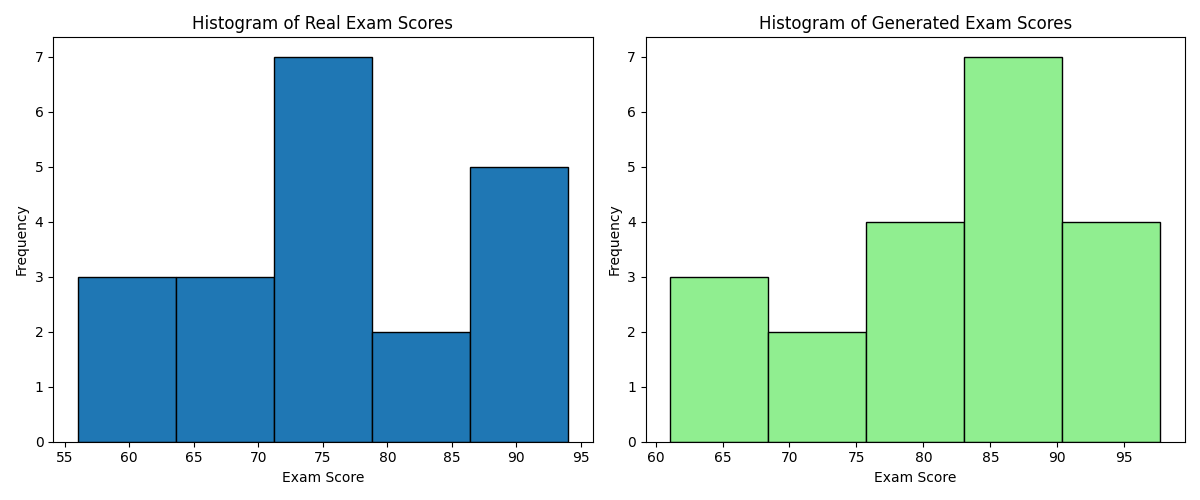

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import io
import base64
import IPython.display as display

# Generate random data
generated_scores = np.random.normal(mean_score, std_dev, 20)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of real data
axes[0].hist(df['Exam_Score'], bins=5, edgecolor='black')
axes[0].set_title('Histogram of Real Exam Scores')
axes[0].set_xlabel('Exam Score')
axes[0].set_ylabel('Frequency')

# Histogram of generated data
axes[1].hist(generated_scores, bins=5, edgecolor='black', color='lightgreen')
axes[1].set_title('Histogram of Generated Exam Scores')
axes[1].set_xlabel('Exam Score')
axes[1].set_ylabel('Frequency')

plt.tight_layout()

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Histograms of Real and Generated Exam Scores"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [4]:
# Monte Carlo Simulation
num_samples = 100000
simulated_scores = np.random.normal(mean_score, std_dev, num_samples)
probability_geq_75 = np.sum(simulated_scores >= 75) / num_samples

print(f"\nEstimated probability of scoring >= 75: {probability_geq_75:.4f}")


Estimated probability of scoring >= 75: 0.5634


In [5]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [6]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

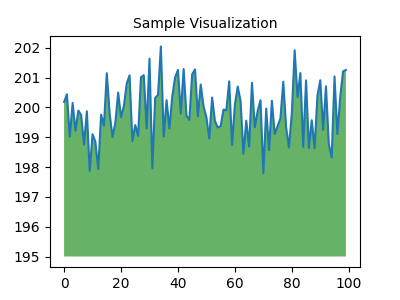

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Hypothesized Mean: 55

One-Sample t-test results:
T-statistic: 8.1829
P-value: 0.0000

Conclusion:
Since the p-value (0.0000) is less than the significance level (0.05), we reject the null hypothesis.
There is sufficient evidence to conclude that the true mean exam score is different from 55.


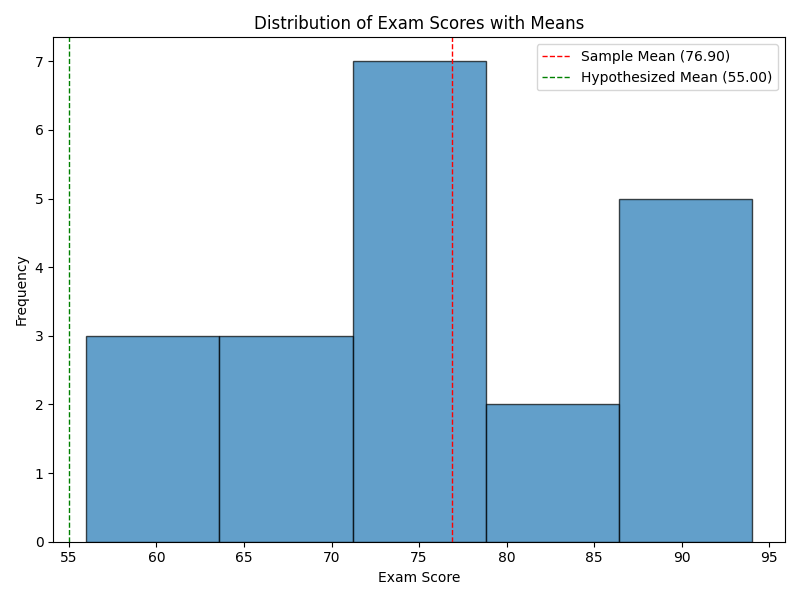

In [7]:
from scipy import stats
import matplotlib.pyplot as plt
import io
import base64
import IPython.display as display

# Calculate the hypothesized mean based on the last 3 digits of the student ID
student_id_last_3_digits = 105
hypothesized_mean = (student_id_last_3_digits % 50) + 50
print(f"Hypothesized Mean: {hypothesized_mean}")

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['Exam_Score'], popmean=hypothesized_mean)

print(f"\nOne-Sample t-test results:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Report conclusion
alpha = 0.05
print("\nConclusion:")
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print(f"There is sufficient evidence to conclude that the true mean exam score is different from {hypothesized_mean}.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis.")
    print(f"There is not enough evidence to conclude that the true mean exam score is different from {hypothesized_mean}.")

# Visualization
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df['Exam_Score'], bins=5, edgecolor='black', alpha=0.7)
ax.axvline(mean_score, color='red', linestyle='dashed', linewidth=1, label=f'Sample Mean ({mean_score:.2f})')
ax.axvline(hypothesized_mean, color='green', linestyle='dashed', linewidth=1, label=f'Hypothesized Mean ({hypothesized_mean:.2f})')
ax.set_title('Distribution of Exam Scores with Means')
ax.set_xlabel('Exam Score')
ax.set_ylabel('Frequency')
ax.legend()
plt.tight_layout()

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Histogram of Exam Scores with Sample and Hypothesized Means"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
